In [1]:
##############################################################################
#                                                                            #
#  Code for the USENIX Security '22 paper:                                   #
#  How Machine Learning Is Solving the Binary Function Similarity Problem.   #
#                                                                            #
#  MIT License                                                               #
#                                                                            #
#  Copyright (c) 2019-2022 Cisco Talos                                       #
#                                                                            #
#  Permission is hereby granted, free of charge, to any person obtaining     #
#  a copy of this software and associated documentation files (the           #
#  "Software"), to deal in the Software without restriction, including       #
#  without limitation the rights to use, copy, modify, merge, publish,       #
#  distribute, sublicense, and/or sell copies of the Software, and to        #
#  permit persons to whom the Software is furnished to do so, subject to     #
#  the following conditions:                                                 #
#                                                                            #
#  The above copyright notice and this permission notice shall be            #
#  included in all copies or substantial portions of the Software.           #
#                                                                            #
#  THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,           #
#  EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF        #
#  MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND                     #
#  NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE    #
#  LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION    #
#  OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION     #
#  WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.           #
#                                                                            #
#  Create Recall@N plot                                                      #
#                                                                            #
##############################################################################

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
# valid_markers = mpl.markers.MarkerStyle.filled_markers 
markers = np.random.choice(valid_markers, 12, replace=False)

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/1n/v9vh_s755_339nm9wtl6qcqw0000gn/T/ipykernel_18254/617174442.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])


In [4]:
OUTPUT_DIR = "_output/Dataset-2/"


In [5]:
for _tc in list(range(1, 4)):
    df_rank = pd.read_csv(os.path.join(OUTPUT_DIR, "df_rank_tc{}.csv".format(_tc)), index_col=0)
    
    break

In [6]:
df_rank.columns

Index(['rank_testing_Dataset-2_SAFE_ASM-list_Trainable_e10',
       'rank_testing_Dataset-2_pvdm_e10',
       'rank_testing_Dataset-2_SAFE_ASM-list_e5',
       'rank_testing_Dataset-2_catalog1_16',
       'rank_testing_Dataset-2_SAFE_ASM-list_250_e5',
       'rank_testing_Dataset-2_GNN-s2v_ArithMean_e5',
       'rank_testing_Dataset-2_GMN_NoFeatures_e16',
       'rank_testing_Dataset-2_catalog1_64',
       'rank_testing_Dataset-2_GMN_OPC-200_e16',
       'rank_testing_Dataset-2_GGSNN_OPC-200_e10',
       'rank_testing_Dataset-2_GNN-s2v_GeminiNN_OPC-200_e5',
       'rank_testing_Dataset-2_GGSNN_NoFeatures_e10',
       'rank_testing_Dataset-2_GNN-s2v_AttentionMean_e5',
       'rank_testing_Dataset-2_catalog1_128', 'rank_testing_Dataset-2_Trex',
       'rank_testing_Dataset-2_IMM:1.00_MNEM:1.00_GRAPH:1.00',
       'rank_testing_Dataset-2_Zeek',
       'rank_testing_Dataset-2_GNN-s2v_GeminiNN_NoFeatures_e5',
       'rank_testing_Dataset-2_GNN-s2v_RNN_ASM_e7',
       'rank_testing_Dataset-2

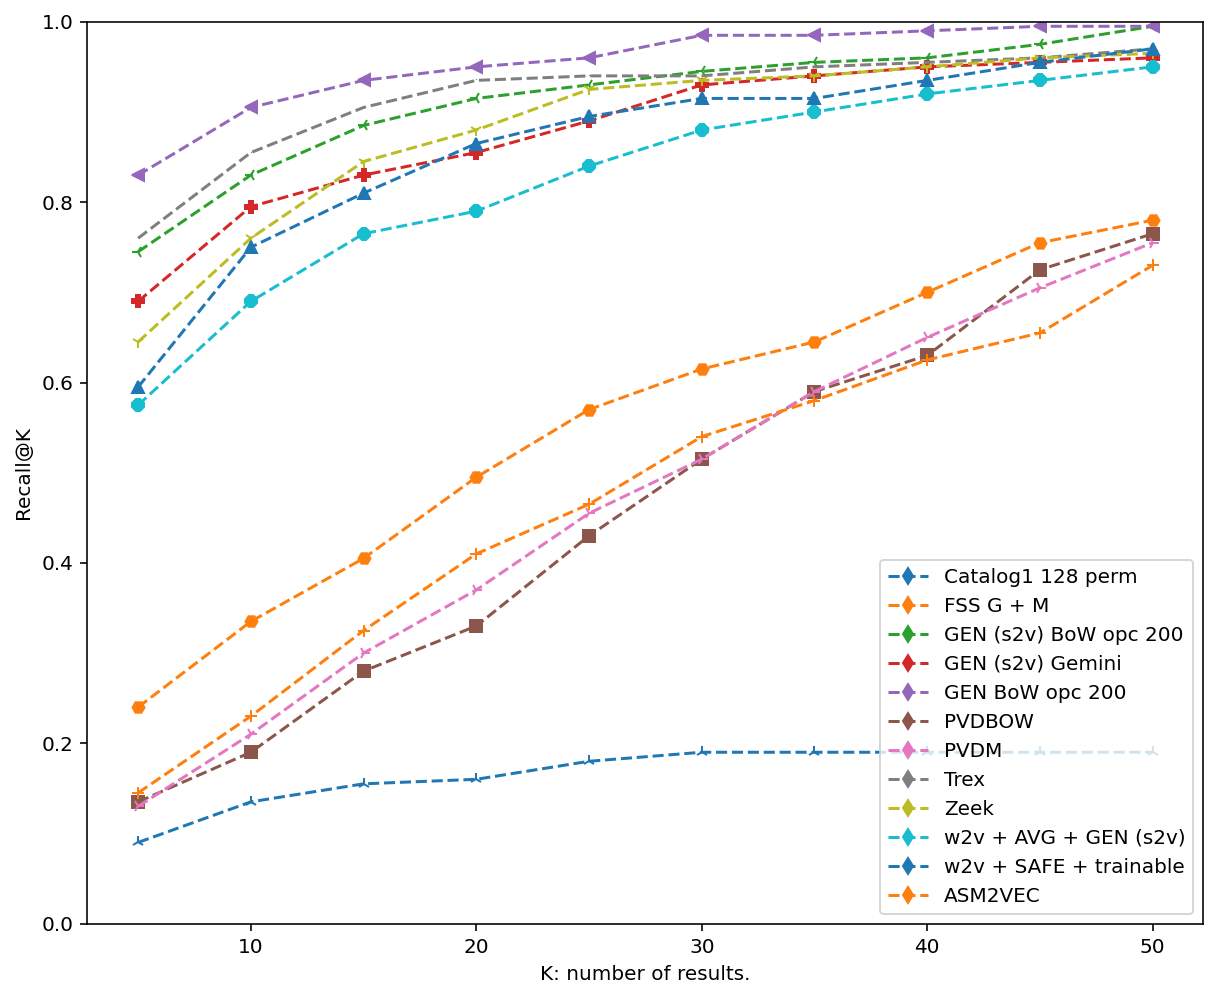

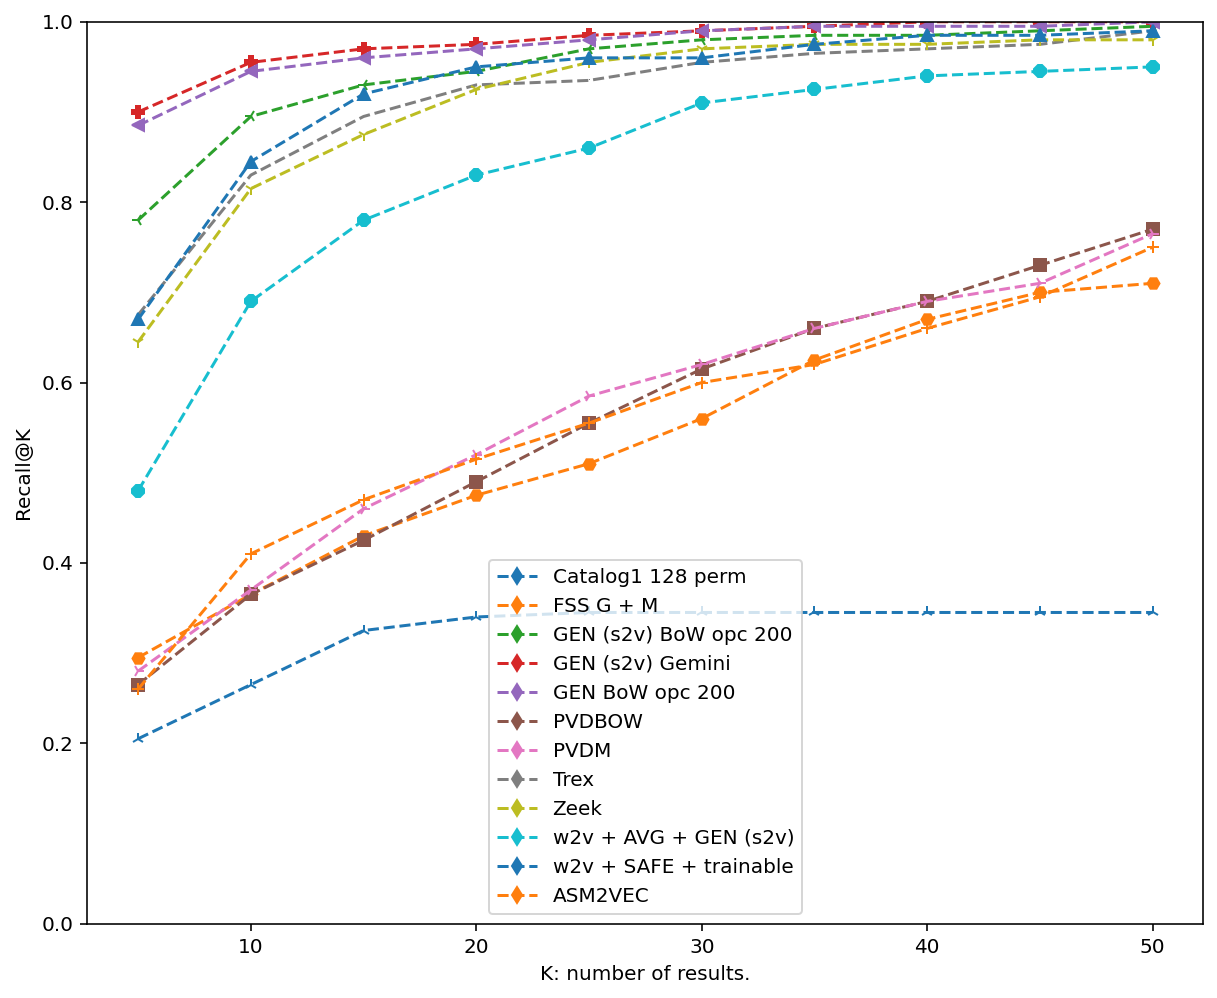

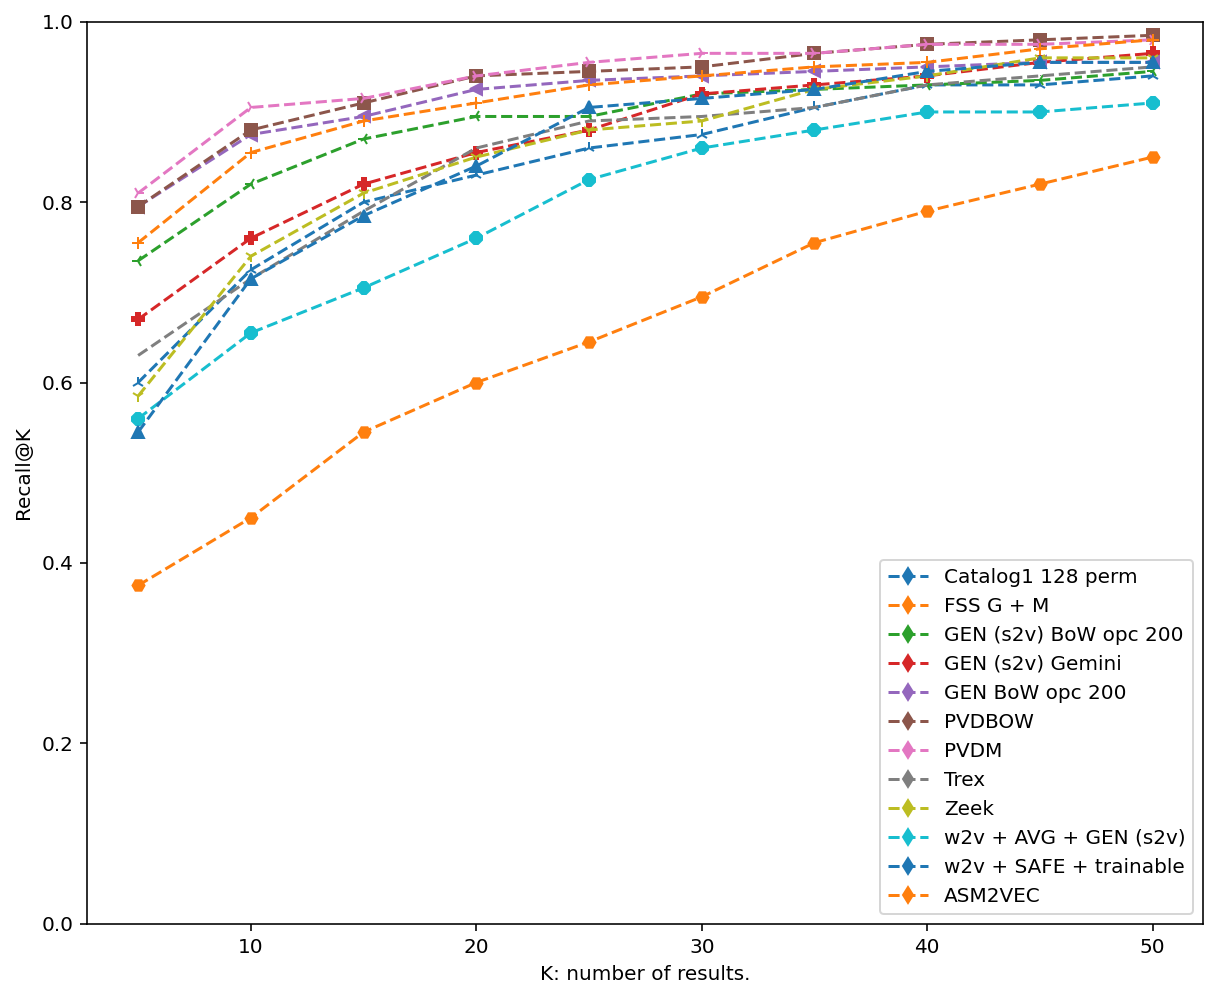

In [7]:
for _tc in list(range(1, 4)):
    df_rank = pd.read_csv(os.path.join(OUTPUT_DIR, "df_rank_tc{}.csv".format(_tc)), index_col=0)
    
    del df_rank['rank_testing_Dataset-2_GNN-s2v_GeminiNN_NoFeatures_e5']
    del df_rank['rank_testing_Dataset-2_GNN-s2v_AttentionMean_e5']
    del df_rank['rank_testing_Dataset-2_GNN-s2v_RNN_ASM_e7']

    del df_rank['rank_testing_Dataset-2_catalog1_16']
    del df_rank['rank_testing_Dataset-2_catalog1_32']
    del df_rank['rank_testing_Dataset-2_catalog1_64']

    del df_rank['rank_testing_Dataset-2_GGSNN_NoFeatures_e10']
    del df_rank['rank_testing_Dataset-2_GMN_OPC-200_e16']
    del df_rank['rank_testing_Dataset-2_GMN_NoFeatures_e16']

    del df_rank['rank_testing_Dataset-2_IMM:0.00_MNEM:0.00_GRAPH:1.00']
    del df_rank['rank_testing_Dataset-2_IMM:1.00_MNEM:1.00_GRAPH:1.00']
    del df_rank['rank_testing_Dataset-2_IMM:4.00_MNEM:0.05_GRAPH:1.00']

    del df_rank['rank_testing_Dataset-2_SAFE_ASM-list_250_e5']
    del df_rank['rank_testing_Dataset-2_SAFE_ASM-list_e5']
    del df_rank['rank_testing_Dataset-2_SAFE_ASM-list_Rand_Trainable_e10']
    
    df_rank.rename(columns={
        'rank_testing_Dataset-2_GNN-s2v_GeminiNN_OPC-200_e5': 'GEN (s2v) BoW opc 200',
        'rank_testing_Dataset-2_GNN-s2v_GeminiNN_GeminiFeatures_e5': 'GEN (s2v) Gemini',
        'rank_testing_Dataset-2_GNN-s2v_ArithMean_e5': 'w2v + AVG + GEN (s2v)',
        'rank_testing_Dataset-2_catalog1_128': 'Catalog1 128 perm',
        'rank_testing_Dataset-2_GGSNN_OPC-200_e10': 'GEN BoW opc 200',
        'rank_testing_Dataset-2_IMM:0.00_MNEM:1.00_GRAPH:1.00': 'FSS G + M',
        'rank_testing_Dataset-2_SAFE_ASM-list_Trainable_e10': 'w2v + SAFE + trainable',
        'rank_testing_Dataset-2_Zeek': 'Zeek',
        'rank_testing_Dataset-2_Trex': 'Trex',
        'rank_testing_Dataset-2_pvdm_e10': 'PVDM',
        'rank_testing_Dataset-2_pvdbow_e10': 'PVDBOW',
        'rank_testing_Dataset-2_asm2vec_e10': 'ASM2VEC'
    }, inplace=True)
    
    cc = sorted(df_rank.columns)
    ccs = cc[1:] + [cc[0]]
    df_rank = df_rank[ccs]
    
    ax = df_rank.plot(logy=False,
                  style='--', marker='d',
                  ylim=(0,1), figsize=(10,10),
    #                   title="Recall at different K values for X-Comp-Bit")
                     )

    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

    ax.set_aspect(aspect=40)
    ax.set_xlabel("K: number of results.")
    ax.set_ylabel("Recall@K")

    for i, line in enumerate(ax.get_lines()):
        line.set_marker(markers[i])
    
    if _tc == 1:
        _tc = "XO"
    if _tc == 2:
        _tc = "XA"
    if _tc == 3:
        _tc = "XM"
    
    plt.savefig(os.path.join(OUTPUT_DIR, "recall@k_Dataset-2_tc{}.png".format(_tc)), dpi=300)